In [7]:
from defectlib import extract_bnfeatures_from_defect, train_svm_classifier, plot_tsne
import numpy as np
from bokeh.plotting import figure, output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
features, labels, sns, images = extract_bnfeatures_from_defect('./Data/Lam/SH0403/')

there are 31 images inside c0
Processing ./Data/Lam/SH0403/2A/c0/1_c0_2AAAAAA_16.jpg...
there are 15 images inside c1
Processing ./Data/Lam/SH0403/2A/c1/1_c1_2AAAAAA_16.jpg...
there are 24 images inside c13
Processing ./Data/Lam/SH0403/2A/c13/1_c13_2AAAAAA_15.jpg...
there are 24 images inside c9
Processing ./Data/Lam/SH0403/2A/c9/1_c9_2AAAAAA_16.jpg...
there are 47 images inside c8
Processing ./Data/Lam/SH0403/4A/c8/14_4AAAAAA_0.jpg...
there are 138 images inside c9
Processing ./Data/Lam/SH0403/4A/c9/10_4AAAAAA_0.jpg...
Processing ./Data/Lam/SH0403/4A/c9/21_4AAAAAA_17.jpg...


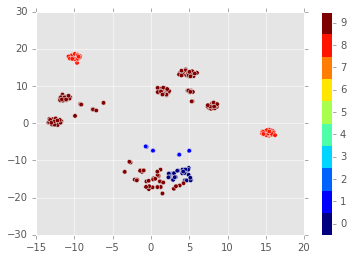

In [5]:
plot_tsne(features, labels, sns, perplexity=30, interactive=False, images=images)

In [8]:
plot_tsne(features, labels, sns, perplexity=30, interactive=True, images=images)

In [13]:
features[labels=='0'].shape

(31, 2048)

In [16]:
features[labels=='0'][0:20]

array([[-0.05580239,  0.05690852,  0.00544938, ...,  0.00815547,
         0.01373813, -0.03181316],
       [-0.02099925,  0.01916191,  0.01040464, ...,  0.01010859,
         0.00262287,  0.03375408],
       [-0.06065743,  0.00656421,  0.00397114, ...,  0.01830585,
        -0.01514745,  0.08105253],
       ..., 
       [-0.03387193,  0.0111357 ,  0.04706603, ...,  0.03053736,
         0.03575024,  0.19434272],
       [-0.02366131,  0.00907289, -0.02886495, ...,  0.00765384,
        -0.01929048,  0.11633689],
       [-0.03377193,  0.00968772, -0.01558629, ...,  0.00470034,
         0.04148444,  0.07355941]])

In [59]:
from sklearn import svm

In [107]:
clf = svm.OneClassSVM(nu=0.01, kernel='rbf', gamma=0.01)

In [108]:
clf.fit(features[labels=='0'])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.01, kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [109]:
y_0_predict = clf.predict(features[labels=='0'])

In [110]:
import pandas as pd

In [111]:
pd.Series(y_0_predict).value_counts()

 1.0    22
-1.0     9
dtype: int64

In [101]:
y_1_predict = clf.predict(features[labels!='0'])

In [95]:
y_1_predict

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [112]:
train_svm_classifier(features, labels, sns, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.1s
[CV] kernel=linear, C=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.1s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.985294, total=   0.1s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.1s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.1s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.985294, total=   0.1s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.1s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.1s
[CV] kernel=linear, C=100 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)